# Assignment 1
# COMP 652: Machine Learning

## Samin Yeasar Arnob
## McGill ID: 260800927
    




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#########################################################################################


# 1.  regression, overfitting and regularization 


##########################################################################################

## Answer 1(a) 

In [2]:
df1 = pd.read_csv('hw1-q1x.csv',delim_whitespace =True,header=None,dtype=np.float)
df2 = pd.read_csv('hw1-q1y.csv',delim_whitespace =True,header=None,dtype=np.float)
Data=pd.concat([df1,df2],axis=1)
Data.columns=['X1','X2','Y']
no_data = df1.shape[0]

In [3]:
#Data centering
Cen_Data = Data - Data.mean(axis=0) #axis=0 means row wise, rows are example here

In [4]:
# splitting training-testing data

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(Cen_Data, test_size=0.2,random_state=34) #randomly split train-test

feat_no = train_data.shape[1] - 1 # last column is for labels

Xm_train = train_data.iloc[:,:feat_no].values
y_train = train_data.iloc[:,feat_no:].values

Xm_test = test_data.iloc[:,:feat_no].values
y_test = test_data.iloc[:,feat_no:].values


print(Xm_train.shape)
print(Xm_test.shape)

(80, 2)
(20, 2)


## Report:

* I have centered the data which is basically remove means from input and output
$\{(x_i-\overline{x},y_i-\overline{y})\}^m_{i=1}$
* As centering makes the bias terms zero, I didn't add the bias term

## Answer 1(b)

In [5]:
# manual code to compute W  
def computeW (Xm_train,y_train,feat_no,lmbda):
    a = np.dot(Xm_train.T,Xm_train) + lmbda*np.eye(feat_no)
    a = np.linalg.pinv(a)
    W = np.dot(a, np.dot(Xm_train.T,y_train))
    return W

In [6]:
# create lambda parameter vector
lmbda = []
l = 0.001
while l <= 10**1:
    l = l*10
    if l==0 :
        break
    else :
        lmbda = np.append(lmbda, l)
lmbda = lmbda.reshape(1,-1)
print('lmbda:',lmbda) 

lmbda: [[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]]


In [7]:
# create lambda parameter vector
lmbda = np.array([])
l = 0.01
while l <= 10**5:
    lmbda = np.append(lmbda, l)
    l = l*10
lmbda = lmbda.reshape(1,-1)
print('lmbda:',lmbda)    

lmbda: [[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]]


In [8]:
lmbda[0,0]

0.01

In [9]:
# lmbda has to be numpy array
def RMSEresult(Xm_train,y_train,Xm_test,y_test,lmbda,norm):
    from sklearn.metrics import mean_squared_error
    from sklearn import datasets, linear_model
    
    feat_no = Xm_train.shape[1]
    #W_vec = np.zeros( ( 2,len(lmbda) ) )
    W_vec = pd.DataFrame( np.zeros(( feat_no,lmbda.shape[1] )) )
    
    RMSE_traindata = []
    RMSE_testdata = []
    
    Hypothesis_train = {}
    Hypothesis_test = {}
    
    for i in range (lmbda.shape[1]):
        
    #####  manual code to compute W ######## 
        #W = computeW (Xm_train,y_train,feat_no,lmbda[i])
        #W_vec[i] = W        
        #Hypothesis_train = np.dot(Xm_train,W)
        #Hypothesis_test = np.dot(Xm_test,W)
        
        
    ##### using built-in model ######  
        
        if norm == 'l2':
            clf = linear_model.Ridge(alpha=lmbda[0,i])
        if norm == 'l1' :
            clf = linear_model.Lasso(alpha=lmbda[0,i])
        
        
        clf.fit(Xm_train, y_train)
        
        
        
        H_train = clf.predict (Xm_train)
        H_test = clf.predict (Xm_test)
        
        Hypothesis_train['lmbda_%d'%i] = H_train.reshape(-1,1)
        Hypothesis_test['lmbda_%d'%i] = H_test.reshape(-1,1)
        
        W=np.reshape(clf.coef_,(-1,1))       
        W_vec[i] = W
        
        
        RMSE_traindata = np.append ( RMSE_traindata , np.sqrt( mean_squared_error(y_train, H_train) ) )
        RMSE_testdata = np.append ( RMSE_testdata , np.sqrt( mean_squared_error(y_test, H_test) ) )
        
    return (RMSE_traindata,RMSE_testdata, W_vec,Hypothesis_train,Hypothesis_test)

In [10]:
RMSE_traindata, RMSE_testdata,W_vec,Hypothesis_train,Hypothesis_test = RMSEresult(Xm_train,y_train,Xm_test,y_test,lmbda,'l2')

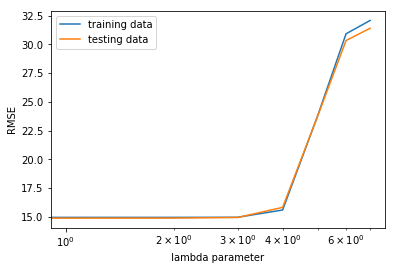

In [11]:
# Graph1: RMSE for training data and testing data

#plt.loglog(lmbda,RMSE_testdata,label='testing data')
#plt.loglog(lmbda,RMSE_traindata,label='training data')

plt.semilogx(RMSE_traindata,label='training data')
plt.semilogx(RMSE_testdata,label='testing data')
plt.xlabel(' lambda parameter ')
plt.ylabel('RMSE')
plt.legend()
#plt.savefig('D:\\University materials\\Winter 2018\\Applied ML\\winter 2018\\Assignments\\Kaggle\\my codes\\train_validation_H3.png')
plt.show()

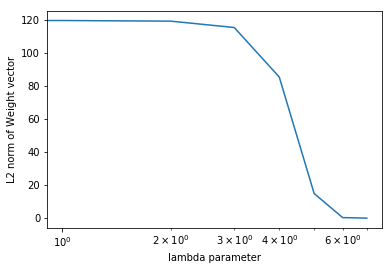

In [12]:
# Graph2: L2 norm of weight vectors

W_L2norm = np.sum(W_vec**2,axis=0)
plt.semilogx( W_L2norm.values )
plt.xlabel ('lambda parameter')
plt.ylabel ('L2 norm of Weight vector')
plt.show()

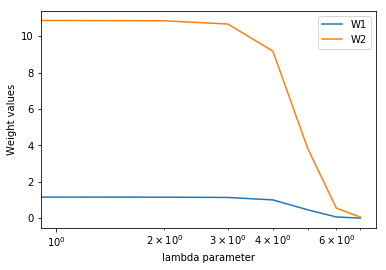

In [13]:
#Graph3: Actual values of weight obtained

plt.semilogx( W_vec.loc[[0], : ].values[0] ,label = 'W1')
plt.semilogx( W_vec.loc[[1], : ].values[0] ,label = 'W2')
plt.xlabel ('lambda parameter')
plt.ylabel ('Weight values')
plt.legend()
plt.show()

## Report:
* For Lambda, $\lambda=0$ means, no regularization. 
* We see that, at $\lambda=0$ we get min training error and  as we increase the value of $\lambda$ training error increases but for testing data as we increse lambda the error decreases and after $\lambda$=10 RMSE start to increase. 


Thus at $\lambda$=0, when no regularization was used, training data was overfitted.

In [14]:
print('Training data gets least RMSE for lambda:',lmbda[0,np.argwhere(RMSE_traindata == min(RMSE_traindata)) ])
print('Testing data gets least RMSE for lambda:',lmbda[0,np.argwhere(RMSE_testdata == min(RMSE_testdata)) ])

Training data gets least RMSE for lambda: [[0.01]]
Testing data gets least RMSE for lambda: [[0.01]]


## Answer 1(c)

In [15]:
def ComputeValid_VS_lmbda(Xm_train,y_train,kfold,lmbda,norm):
    dlen = Xm_train.shape[0]
    inc = np.int(dlen/kfold)

    RMSE_traindata = np.zeros([kfold,lmbda.shape[1]])
    RMSE_validdata = np.zeros([kfold,lmbda.shape[1]])
    
    
    Hypothesis_valid = []
    Hypothesis_train = []
    
    
    valid_score = np.zeros([])

    for i in range (kfold):
        # mask the data to be used as validation
        #############################################################################
        msk = np.isin (np.linspace(1,dlen,dlen), np.linspace(1+inc*i,inc+inc*i,inc)) 
        #############################################################################
        train_X = Xm_train[~msk] 
        train_y = y_train[~msk]

        valid_X = Xm_train[msk] 
        valid_y = y_train[msk]

        feat_on = train_X.shape[1]

        RMSE_traindata[i,:], RMSE_validdata[i,:], W_vec , h_train , h_valid = RMSEresult(train_X,train_y,valid_X,valid_y,lmbda,norm)
        
        #Hypothesis_valid.update(h_valid)
        #Hypothesis_train.update(h_train)
       # for k in range (len(h_train)): 
         #   Hypothesis_valid['lmbda_%d'%k].append (h_valid['lmbda_%d'%k])
        #    Hypothesis_train['lmbda_%d'%k].append (h_train['lmbda_%d'%k])
            
        Hypothesis_valid.append ( h_valid)
        Hypothesis_train.append ( h_valid)
        #Hypothesis_train = np.append ( Hypothesis_train , h_train)
        
        #train_score = np.append(train_score ,RMSE_traindata)
        #valid_score = valid_score + RMSE_validdata
    
    result = np.zeros((y_train.shape[0],lmbda.shape[1]))
    result = np.matrix(result)
    for k in range(lmbda.shape[1]):
        r = 0
        for m in range(kfold):
        
            result[m*inc:inc+r,k] = Hypothesis_valid[m]['lmbda_%d'%k] 
            r+=inc

    #valid_score = np.mean(RMSE_validdata,axis=0)
    #print('Mean validation score for different lambda',valid_score)    
    #return RMSE_traindata , RMSE_validdata , Hypothesis_train.reshape(dlen-np.int(inc),kfold), Hypothesis_valid.reshape(np.int(inc),kfold)
    return RMSE_traindata , RMSE_validdata , result
      

In [16]:
kfold=5
RMSE_traindata, RMSE_validdata,result = ComputeValid_VS_lmbda(Xm_train,y_train,kfold,lmbda,norm='l1')

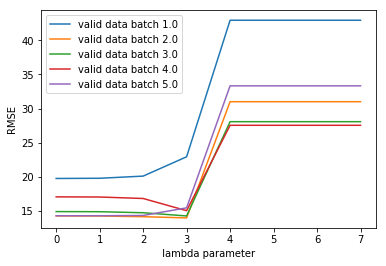

In [17]:
####################################################
# plot RMSE for 5 fold validation data
####################################################

for i in range (RMSE_validdata.shape[0]):
    plt.plot(RMSE_validdata[i,:],label='valid data batch %.1f' %(i+1) )
    plt.xlabel(' lambda parameter ')
    plt.ylabel('RMSE')
    plt.legend()
plt.show()



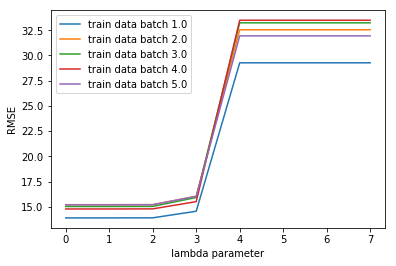

In [18]:
################################################
#plot RMSE for 5 fold training data
################################################

for i in range (RMSE_traindata.shape[0]):
    plt.plot(RMSE_traindata[i,:],label='train data batch %.1f' %(i+1) )
    plt.xlabel(' lambda parameter ')
    plt.ylabel('RMSE')
    plt.legend()
plt.show()

In [19]:
valid_score = np.mean(RMSE_validdata,axis=0)
print('Average Validation RMSE Score',valid_score)

Average Validation RMSE Score [16.07387259 16.07091321 16.04844751 16.35129533 32.58357559 32.58357559
 32.58357559 32.58357559]


In [20]:
for i in range (RMSE_traindata.shape[0]):
    print('Best Value of Lambda for Training data batch %d = ' %i,  lmbda[ 0, np.argmin(RMSE_traindata[i,:]) ] )
    

Best Value of Lambda for Training data batch 0 =  0.01
Best Value of Lambda for Training data batch 1 =  0.01
Best Value of Lambda for Training data batch 2 =  0.01
Best Value of Lambda for Training data batch 3 =  0.01
Best Value of Lambda for Training data batch 4 =  0.01


In [21]:
for i in range (RMSE_validdata.shape[0]):
    print('Best Value of Lambda for Validation data batch %d = ' %i,  lmbda[ 0, np.argmin(RMSE_validdata[i,:]) ] )

Best Value of Lambda for Validation data batch 0 =  0.01
Best Value of Lambda for Validation data batch 1 =  10.0
Best Value of Lambda for Validation data batch 2 =  10.0
Best Value of Lambda for Validation data batch 3 =  10.0
Best Value of Lambda for Validation data batch 4 =  0.01


## Report:

* best value for lambda for training data is same as 1(b) but it varies for different validation batch


## Answer 1(d)

In [22]:
y_train_sorted = np.sort(y_train,axis=0)
msk = y_train.argsort(axis=0)
Xm_train_sorted = Xm_train[msk]                 # dimension of Xm_sort becomes (80,1,2)
Xm_train_sorted = Xm_train_sorted.reshape(80,2)       # we correct the dimension

In [23]:
kfold=5
sorted_RMSE_traindata, sorted_RMSE_validdata , _ = ComputeValid_VS_lmbda(Xm_train_sorted,y_train_sorted,kfold,lmbda,'l2')

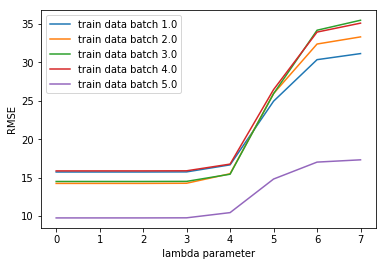

In [24]:
################################################
#plot RMSE for 5 fold training data
################################################

for i in range (sorted_RMSE_traindata.shape[0]):
    plt.plot(sorted_RMSE_traindata[i,:],label='train data batch %.1f' %(i+1) )
    plt.xlabel(' lambda parameter ')
    plt.ylabel('RMSE')
    plt.legend()
plt.show()

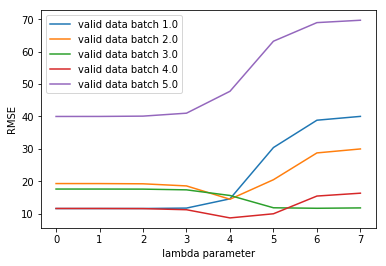

In [25]:
####################################################
# plot RMSE for 5 fold validation data
####################################################

for i in range (sorted_RMSE_validdata.shape[0]):
    plt.plot(sorted_RMSE_validdata[i,:],label='valid data batch %.1f' %(i+1) )
    plt.xlabel(' lambda parameter ')
    plt.ylabel('RMSE')
    plt.legend()
plt.show()

In [26]:
for i in range (sorted_RMSE_traindata.shape[0]):
    print('Best Value of Lambda for Training data batch %d = ' %i,  lmbda[ 0, np.argmin(sorted_RMSE_traindata[i,:]) ] )


Best Value of Lambda for Training data batch 0 =  0.01
Best Value of Lambda for Training data batch 1 =  0.01
Best Value of Lambda for Training data batch 2 =  0.01
Best Value of Lambda for Training data batch 3 =  0.01
Best Value of Lambda for Training data batch 4 =  0.01


In [27]:
for i in range (sorted_RMSE_validdata.shape[0]):
    print('Best Value of Lambda for Validation data batch %d = ' %i,  lmbda[ 0, np.argmin(sorted_RMSE_validdata[i,:]) ] )

Best Value of Lambda for Validation data batch 0 =  0.01
Best Value of Lambda for Validation data batch 1 =  100.0
Best Value of Lambda for Validation data batch 2 =  10000.0
Best Value of Lambda for Validation data batch 3 =  100.0
Best Value of Lambda for Validation data batch 4 =  0.01


## Report  
* From traing and validation output it's clear that data, for the first batch of training batch the model was most overfitted. For batch 1 data, training give the least RMSE and validation gives the highest RMSE score across the lambda range
* So we can say, when data X have low value they are more scattered (have high variance)

## Answer 1(e)

In [28]:
# given
mu=np.linspace(-1,1,5).reshape(1,-1)
print(mu)
print(mu.shape)

[[-1.  -0.5  0.   0.5  1. ]]
(1, 5)


In [29]:
# given
sigma_sqr = np.array([0.1,0.5,1,5]).reshape(1,-1)

$ \phi_j(X) = \exp^{-(\frac{(X-\mu_j)^2}{\sigma^2})}$
* $\mu_j$ controls the position along x-axis and varies from (-1,1). 
* $\sigma$ controls width/spacing

In [30]:
np.tile(mu,Xm_train.shape[1])

array([[-1. , -0.5,  0. ,  0.5,  1. , -1. , -0.5,  0. ,  0.5,  1. ]])

In [31]:
def gaussian_basis (X,mu,sigma_sqr):
    x = X.repeat(mu.shape[1],axis=1) 
    mu = np.tile(mu,X.shape[1])
    psi  = np.exp ( (-1)*( (x-mu)**2/(sigma_sqr) ) )# or X[:,np.newaxis] - w
    return psi

## Answer 1(f)

In [32]:
# no regularization 
lmbda  = np.array([0])
lmbda = lmbda.reshape(1,-1)
print(lmbda.shape)

(1, 1)


In [33]:

RMSE_GaussBasis_train = []
RMSE_GaussBasis_test = []
W_vec = {}
for l in range (sigma_sqr.shape[1]):
    phi_train = gaussian_basis (Xm_train,mu,sigma_sqr[0,l])
    phi_test = gaussian_basis (Xm_test,mu,sigma_sqr[0,l])
    
    train, test,W_vec[str(sigma_sqr[0,l])],_,_ = RMSEresult(phi_train,y_train,phi_test,y_test,lmbda,norm='l2')
    RMSE_GaussBasis_train = np.append(RMSE_GaussBasis_train,train)
    RMSE_GaussBasis_test = np.append(RMSE_GaussBasis_test,test)
    
RMSE_GaussBasis_train = RMSE_GaussBasis_train
RMSE_GaussBasis_test = RMSE_GaussBasis_test
RMSE_traindata, RMSE_testdata,W_vec , _ ,_ = RMSEresult(Xm_train,y_train,Xm_test,y_test,lmbda,norm='l2')

In [34]:
'''
RMSE_GaussBasis_train = {}
RMSE_GaussBasis_test = {}
W_vec = {}
for l in range (sigma_sqr.shape[1]):
    phi_train = gaussian_basis (Xm_train,mu,sigma_sqr[0,l])
    phi_test = gaussian_basis (Xm_test,mu,sigma_sqr[0,l])
    
    RMSE_GaussBasis_train[str(sigma_sqr[0,l])], RMSE_GaussBasis_test[str(sigma_sqr[0,l])],W_vec[str(sigma_sqr[0,l])] = RMSEresult(phi_train,y_train,phi_test,y_test,lmbda)
    
    #RMSE_validdata[str(l)] = ComputeValid_VS_lmbda(phi_train,y_train,kfold,lmbda)
'''

'\nRMSE_GaussBasis_train = {}\nRMSE_GaussBasis_test = {}\nW_vec = {}\nfor l in range (sigma_sqr.shape[1]):\n    phi_train = gaussian_basis (Xm_train,mu,sigma_sqr[0,l])\n    phi_test = gaussian_basis (Xm_test,mu,sigma_sqr[0,l])\n    \n    RMSE_GaussBasis_train[str(sigma_sqr[0,l])], RMSE_GaussBasis_test[str(sigma_sqr[0,l])],W_vec[str(sigma_sqr[0,l])] = RMSEresult(phi_train,y_train,phi_test,y_test,lmbda)\n    \n    #RMSE_validdata[str(l)] = ComputeValid_VS_lmbda(phi_train,y_train,kfold,lmbda)\n'

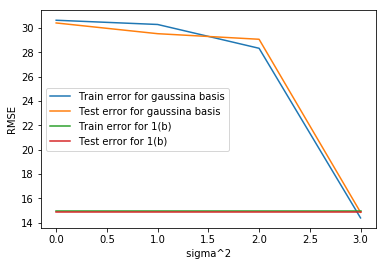

In [35]:
plt.plot(RMSE_GaussBasis_train,label='Train error for gaussina basis')
plt.plot(RMSE_GaussBasis_test,label='Test error for gaussina basis')
plt.plot(RMSE_traindata[0].repeat(len(sigma_sqr[0])),label='Train error for 1(b)')
plt.plot(RMSE_testdata[0].repeat(len(sigma_sqr[0])),label='Test error for 1(b)')
plt.xlabel(' sigma^2 ')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Report
* The two constant lines drawn are the Train and test RMSE ($\lambda$=0, no regularization) calculated at 1(b).

* more complex (fits well = higher $\sigma^2$) == > high variance 
* simple (doesn't fit well ) == > biased solution 


In [36]:
print('Higher variance as we increse sigma^2',RMSE_GaussBasis_test - RMSE_GaussBasis_train )

Higher variance as we increse sigma^2 [-0.22235882 -0.75606063  0.74072019  0.46067255]


## Answer 1(g)

In order to derive a learning algorithm that computes both the placement of the mean $\mu$
of the basis function, we need to update the weight $w$ and $\mu$ iteratively so as to performing
two gradient descent algorithms. The cost function that we need to minimize with
respect to $\mu$ is derived as follows. Considering the cost function of logistic regression,

\begin{align}
    J(W) = & - \frac{1}{m} \Bigg[  \sum_1^m y_i log(h_i) + (1-y_i) log(1-h_i)  \Bigg]
\end{align}

The derivative of the cost function J (w) with respect to  is calculated as follows. 

\begin{align}
    \frac{\partial J}{\partial \mu} = & - \frac{1}{m} \Bigg[  \sum_1^m y_i w \frac{\partial \phi(x_i)}{\partial \mu} + \frac{(1-y_i)}{1-h} (-w) \frac{\partial \phi(x_i)}{\partial \mu} \Bigg]  \\
\end{align}

Now,

\begin{align}
    \frac{\partial \phi(x)}{\partial \mu}  & =  \frac{\partial  e^{-\frac{(x-\mu)^2}{2\sigma^2}} } {\partial \mu}  \nonumber \\
                                           &  =  e^{-\frac{(x-\mu)^2}{2\sigma^2}} \times 2 \times \frac{\partial -\frac{(x-\mu)}{2\sigma^2} } {\partial \mu} \nonumber \\
                                           &  =  \frac {e^{-\frac{(x-\mu)^2}{2\sigma^2}} }{\sigma^2} \nonumber \\
                                           & = \frac{\phi(x)}{\sigma^2}
\end{align}


let $L_i = \frac{\partial \phi(x_i)}{\partial \mu} $
\begin{align}
    \frac{\partial J}{\partial \mu} = & - \frac{1}{m} \Bigg[  \sum_1^m y_i w \frac{\partial \phi(x_i)}{\partial \mu} + \frac{(1-y_i)}{1-h} (-w) \frac{\partial \phi(x_i)}{\partial \mu} \Bigg] \nonumber \\
                                    = &  - \frac{1}{m} \Bigg[  \sum_1^m \frac{y_i}{h_i} w L_i - \frac{(1-y_i)}{1-h} w L_i \Bigg] \nonumber \\
                                     = &  - \frac{1}{m} \Bigg[  \sum_1^m (h_i-y_i) w L_i  \Bigg] \nonumber \\
                                      = &  - \frac{1}{m} \Bigg[  \sum_1^m (h_i-y_i) w \frac{\partial \phi(x_i)}{\partial \mu}  \Bigg] 
\end{align}


$\alpha$ = stepsize to update w 

$\beta$ = stepsize to update $\mu$

Repeat until convergence:

\{
\begin{align}
    w_i =: & w_i - \alpha \frac{\partial J(w)}{\partial w_i} \\
    \mu_i =: & \mu_i + \beta \frac{1}{m} \Bigg[  \sum_1^m (h_i-y_i) w \frac{\partial \phi(x_i)}{\partial \mu}  \Bigg]
\end{align}
\}


## Answer 1(h)

### Report:
The algorithm derived is iterative and updates the weight vector as well as the value of
$\mu$ simultaneously. The algorithm can converge to a local minima but not on the global
minima since we are adjusting the weight vector and the mean vector simultaneously. As
a result the it would be quite difficult to optimise the cost function for both the parameters
resulting in a convergence at the local minima but not the global minima.

## Answer 1(i)

In [37]:
Xnew_train = Xm_train[:,1].reshape(-1,1)
Xnew_test = Xm_test[:,1].reshape(-1,1)

In [38]:
# includes 1 bias for each example data
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

## Approach 1

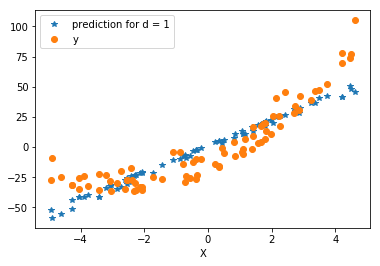

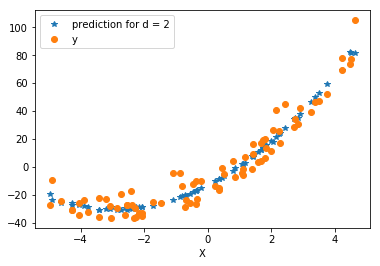

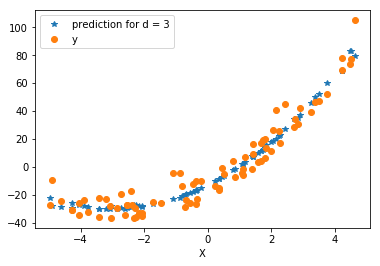

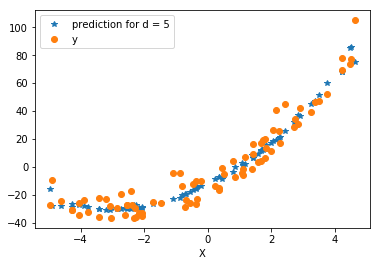

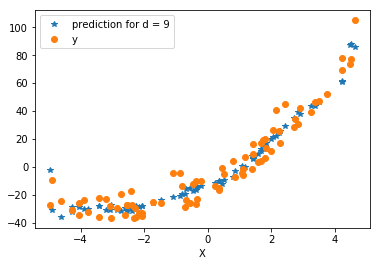

In [39]:
d = np.array( [ [1,2,3,5,9]] )
valid_score = []
# set lambda to zero for "no regularization" 
lmbda  = np.array([0])
lmbda = lmbda.reshape(1,-1)
kfold=5
for i in range(d.shape[1]):
    polynomial = d[0,i]
    Xp_train = getfeaturematrix (Xnew_train,polynomial)
    Xp_valid = getfeaturematrix (Xnew_test,polynomial)


    RMSE_polytraindata, RMSE_polyvaliddata, result= ComputeValid_VS_lmbda(Xp_train,y_train,kfold,lmbda,norm='l2')
    valid_score = np.append( valid_score, np.mean(RMSE_polyvaliddata,axis=0))
    
    
    plt.figure()
    plt.plot(Xnew_train,result,'*',label='prediction for d = %s'%d[0,i])
    plt.plot(Xnew_train,y_train,'o',label='y')
    plt.xlabel('X')
    plt.legend()  
    plt.show()

### Report: the best value of degree $d \in {1,2,3,5,9}$ for non-regularized linear regression

In [40]:
print('best value of degree,d :', d[0,valid_score.argmin()])

best value of degree,d : 2


In [41]:
# create lambda parameter vector
lmbda = []
l = 0.01
while l <= 10**1:
    if l==0 :
        break
    else :
        lmbda = np.append(lmbda, l)
    l = l*10
lmbda = lmbda.reshape(1,-1)
print('lmbda:',lmbda)    

lmbda: [[ 0.01  0.1   1.   10.  ]]


In [42]:
d = np.array( [ [9]] )
d.shape

(1, 1)

In [43]:
d[0,0]

9

In [44]:
d = np.array( [ [9]] )

polynomial = d[0,0]
Xp_train = getfeaturematrix (Xnew_train,polynomial)
Xp_test = getfeaturematrix (Xnew_test,polynomial)

kfold=5


## Approach 2

In [45]:
RMSE_polytraindata, RMSE_polyvaliddata, result = ComputeValid_VS_lmbda(Xp_train,y_train,kfold,lmbda,'l2')

### Report: best $\lambda$ value using five fold cross-validation for d=9 and L2 regulizer 

In [46]:
lmbda[0, RMSE_polytraindata.mean(0).argmin()]

0.01

In [47]:
x_train_sorted = np.sort(Xnew_train,axis=0)
msk = Xnew_train.argsort(axis=0)#.repeat(lmbda.shape[1],axis=1)
result = result[msk].reshape(80,4)              # dimension of Xm_sort becomes (80,1,2)


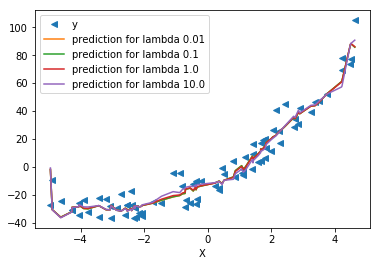

In [48]:
plt.plot(Xnew_train,y_train,'<',label='y')
for i in range (lmbda.shape[1]):
    #plt.figure(1%1)
    plt.plot(x_train_sorted,result[:,i],label='prediction for lambda %s'%lmbda[0,i])
    plt.xlabel('X')  
    #plt.plot(x_train_sorted,y_train,'<',label='y')    
    

plt.legend()
plt.show()

## Approach 3

In [49]:
RMSE_polytraindata, RMSE_polyvaliddata, result = ComputeValid_VS_lmbda(Xp_train,y_train,kfold,lmbda,'l1')

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Report: best $\lambda$ value using five fold cross-validation for d=9 and L1 regulizer 

In [50]:
lmbda[0, RMSE_polytraindata.mean(0).argmin()]

0.1

In [51]:
x_train_sorted = np.sort(Xnew_train,axis=0)
msk = Xnew_train.argsort(axis=0)#.repeat(lmbda.shape[1],axis=1)
result = result[msk].reshape(80,4)              # dimension of Xm_sort becomes (80,1,2)


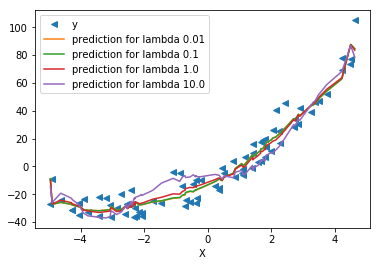

In [52]:
plt.plot(Xnew_train,y_train,'<',label='y')
for i in range (lmbda.shape[1]):
    #plt.figure()
    plt.plot(x_train_sorted,result[:,i],label='prediction for lambda %s'%lmbda[0,i])
    plt.xlabel('X')  
    #plt.plot(x_train_sorted,y_train,'<',label='y')    
    

plt.legend()
plt.show()


## Test error for optimal parameters for 3 approaches



### Approach 1 
* No regularization $\lambda$=0  
* As we got best result for d = 2

In [53]:
d = np.array( [ [2]] )


polynomial = d[0,0]
Xp_train = getfeaturematrix (Xnew_train,polynomial)
Xp_test = getfeaturematrix (Xnew_test,polynomial)



# set lambda to zero for "no regularization" 
lmbda  = np.array([0])
lmbda = lmbda.reshape(1,-1)


In [54]:
# Test error for optimal parameters
W_vec1 = []
_ , error_ap1 ,W_vec1,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l2')

In [55]:
error_ap1

array([7.05318339])

### Approach 2
* Given: d=9 and L2 regulizar 
* best lambda = 0.01

In [56]:
d = np.array( [ [9]] )


polynomial = d[0,0]
Xp_train = getfeaturematrix (Xnew_train,polynomial)
Xp_test = getfeaturematrix (Xnew_test,polynomial)


In [57]:
lmbda = np.array([0.01]).reshape(1,-1)
lmbda.shape

(1, 1)

In [58]:
_ , error_ap2 ,W_vec2,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l2')

In [59]:
error_ap2

array([9.08962225])

### Approach 3
* Given: d=9 and L1 regulizar 
* best lambda = 0.1

In [60]:
lmbda = np.array([0.1]).reshape(1,-1)
lmbda.shape

(1, 1)

In [61]:
_ , error_ap3 ,W_vec3,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l1')

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [62]:
error_ap3

array([9.06936404])

### Report: weight associated with each polynomial for L1 and L2 regression
* As value of lambda is not mentioned we're using optimal of lambda for L1 and L2 we found on last experiment

In [63]:
d = np.array( [ [1,2,3,5,9]] )

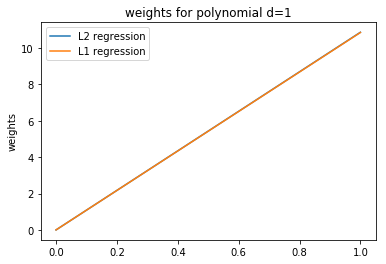

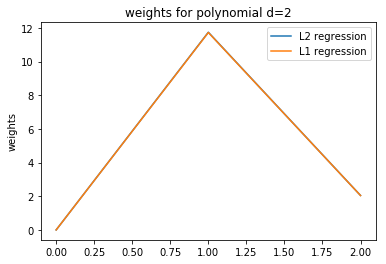

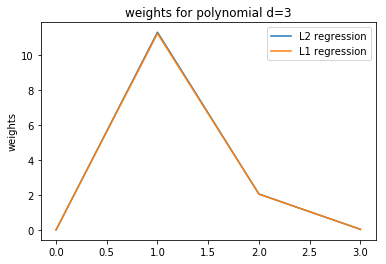

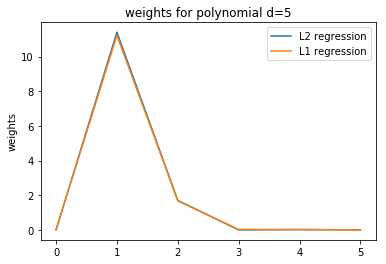

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


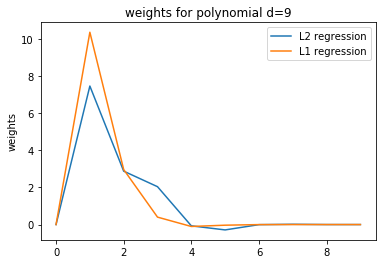

In [64]:
lmbda = np.array([0.01]).reshape(1,-1)

for i in range(d.shape[1]):
    polynomial = d[0,i]
    Xp_train = getfeaturematrix (Xnew_train,polynomial)
    Xp_test = getfeaturematrix (Xnew_test,polynomial)
    
    lmbda = np.array([0.01]).reshape(1,-1)
    _ , _ ,W_vec2,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l2')
    
    lmbda = np.array([0.1]).reshape(1,-1)
    _ , _ ,W_vec3,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l1')
    #print(W_vec2)
    plt.figure()
    plt.title ('weights for polynomial d=%d'%polynomial)
    plt.ylabel('weights')
    plt.plot(W_vec2,label='L2 regression')
    plt.plot(W_vec3,label='L1 regression')

    plt.legend()
    plt.show()    

### Report
* for X'^0 = 1 the bias term is set to zero for both L1 and L2 regression
* For lower polynomial the weights are similar but for polynomial = 9 weight differs
* At d= 9 , more L1 regression highly penalize the higher degree polynomila of data X'

### Compare the result with no regularization at optimal lambda=2

In [65]:
polynomial = 2
Xp_train = getfeaturematrix (Xnew_train,polynomial)
Xp_test = getfeaturematrix (Xnew_test,polynomial)

lmbda = np.array([0.01]).reshape(1,-1)
_ , _ ,W_vec2,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l2')

lmbda = np.array([0.1]).reshape(1,-1)
_ , _ ,W_vec3,_,_ = RMSEresult(Xp_train,y_train,Xp_test,y_test,lmbda,'l1')

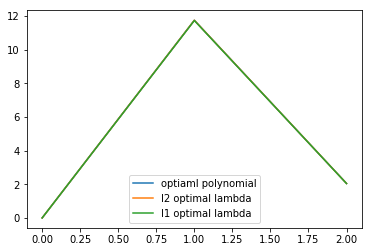

In [66]:
plt.plot(W_vec1,label='optiaml polynomial')
plt.plot(W_vec2,label = 'l2 optimal lambda')
plt.plot(W_vec3,label = 'l1 optimal lambda')
plt.legend()
plt.show()

### Report
* Weights are similar for optimal degree d and L1, L2 regression for optimal lambda
* So no regulizar needed for d=2

############################################################################################


## 2. Maximum likelihood


##############################################################################################

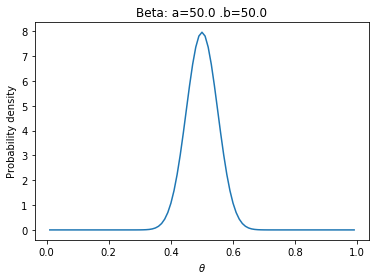

In [67]:
from scipy.stats import beta

#plot posterior density 
a = 50
b = 50
theta = np.arange(0.01,1,0.01)
y = beta.pdf (theta,a,b)
plt.plot(theta,y)
plt.title('Beta: a=%.1f .b=%.1f' % (a,b))
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
plt.show()

posterior mean $\mathbb{E}[\theta] = \frac{\alpha}{\alpha+\beta}$ 

In [68]:
mean = beta.stats(a,b, moments='m')
print('Posterior Mean',mean)

Posterior Mean 0.5


* For infintely large data sets Bayesian and maximum likelihood  results  will agree. 
* For finite data sets, posterior mean for $\theta$ always lies between the prior mean and maximum likelihood estimation of $\theta$.

Thus, Maximum likelihood estimator is a good summary of the distribution 

### Derive maximum likelihood estimate of W


$y_i = h_w(x_i) +\epsilon_i$ where $\epsilon_i \sim N (0,\sigma^2_i) $ 

We can say $y$ is a normal distribution with mean $XW$ and variance $\sigma^2$
$$y \sim N(XW,\sigma^2)$$
\begin{align}
    L(XW,\sigma^2 |x) =& (\frac{1}{2\pi\sigma^2})^{\frac{N}{2}} e^{ - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1} (y_i - x_i w)^2 }\\
                    = & (\frac{1}{2\pi\sigma^2})^{\frac{N}{2}} e^{ - \frac{1}{2\sigma^2} (Y-XW)^T(Y-XW) } \\
     ln ( L(XW,\sigma^2 |x) ) = & - \frac{N}{2} ln(2\pi) - \frac{N}{2} ln(\sigma^2) - \frac{1}{2\sigma^2} (Y-XW)^T(Y-XW) \nonumber \\
     \frac{\partial ln ( L(XW,\sigma^2 |x) ) }{\partial w} = & \frac{1}{2\sigma^2} \frac{\partial (Y-XW)^T(Y-XW)}{\partial w} \nonumber  
\end{align}
Optimal value for W

\begin{align}
    \frac{\partial ln ( L(XW,\sigma^2 |x) ) }{\partial w} = & 0 \nonumber \\
    \frac{1}{2\sigma^2} \frac{\partial (Y-XW)^T(Y-XW)}{\partial w}  = & 0 \nonumber \\
    W = & \frac{(X^TY)^{-1}}{X^TX} \nonumber \\
    W = & (X^TY)^{-1} X^TX 
\end{align}

####################################################################################################

# 3. Baysian analysis and biased coin

###################################################################################

let unknown bias  $\theta$ 

$P(x = H|\theta) = \theta$ 

thus, $P(x = T|\theta) = 1 - \theta$ 

Probability distribution over $x$ can be written as

$$ bern(x|\theta) = \theta^x (1-\theta)^{1-x} $$
$D = \{x_1,x_2, ... x_w\}$ 

We can construct a likelihood function which is a function of $\theta$

\begin{align}
    P(D|\theta) = & \prod_{n=1}^N P(x_n|\theta) = \prod_{n=1}^N \theta^{x_n} (1-\theta)^{1-x_n} \\
    ln (P(D|\theta)) = & \prod_{n=1}^N ln (P(x_n|\theta)) = \prod_{n=1}^N x_n ln(\theta) +(1-x_n) ln(1-\theta) \nonumber \\
    \frac{\partial ln (P(D|\theta))}{\partial \theta} = & \prod_{n=1}^N \frac{x_n}{\theta}  +(1-x_n) \frac{1}{1-\theta} (-1) = 0 \nonumber \\
    \theta_{ML} = & \frac{1}{N} \sum_{n=1}^N x_n
\end{align}

Now outcomes are ${ H , H , H}$ equivalent to $ x_n = {1, 1, 1}$

Thus
\begin{align}
     \theta_{ML} = & \frac{1}{3} \times [1+1+1] \nonumber \nonumber \\ 
                 = & 1
\end{align}




### Report:
This is not a good estimator. We don't have enough data to make good prediciton. As the dataset is very small the model overfits over samples

#############################


# 4. Multivariate Regression


#############################

#####################

## Answer 4(a)

#####################

input-output training data $ \{(x_i,y_i) \}^m_{i=1} $ where each $x_i$ is a $d$-dimensional vector and each $y_i$ is a $p$-dimensional vector, meaning for each example of feature $x_i$ we get $p$ number of possible outputs. Thus $X$ is $m\times d $ dimensinal and $Y$ is $m \times p$ dimensional.
As we know $$Y=\phi(X) W$$
Assuming $\phi(X)$ remains same dimension as $X$, $W$ would be $d \times p$ dimensional.
For single output case, squared error loss function was
\begin{align}
    J(W) = & \sum_{i=1}^m || W^T x_i - y_i ||^2_2 \\
    J(W) = &  || X W - y ||^2_2 \\
    \bigtriangledown_W J= & \bigtriangledown_W \Big[ (XW-Y)^T (XW-Y) \Big]
\end{align}
Where W was $d \times 1$ dimensional.

But now for multiple outputs of $y_i$, assuming outputs are independet of prior, 

squared error loss function for each possible $p$ output will be :
\begin{align}
    J(W_p) = &  || X W_p - y_p ||^2_2 \\
     \bigtriangledown_{W_p} J= & \bigtriangledown_{W_p} \Big[ (XW-Y)^T (XW-Y) \Big] \\
                            = & X^TX W_p -X^T y_p = 0 \\
    thus, \, W_p = & (X^TX)^{-1} X^T y_p                        
\end{align}

#####################

## Answer 4(b)

#####################

From the proof above we can say that if we independently solve $p$ classical linear regression an and get $W$ parameter $p$ times, we solve the multivariate regression task.

In this problem we assumed outputs are independent of prior but in baysian approximation where we have a prior on output, for multivate output we need to consider all the output prior for future $W$ parameter updates and thus can't calculate posterior output inpendently.

consider noisy conversation $y = f(x) + \epsilon = \phi(x)^T w + \epsilon$
according to bayes rules:

$ P_\phi(w|y,X) = \frac{ P_\phi(y|X,w)P(w) }{P_\phi(y|X) } $

#####################################################


# 5. Kernels and RKHS


#####################################################

###########################

## Answer 5 (a)

###########################

In [69]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel as lk
import matplotlib.pyplot as plt

In [70]:
# defined input space
X1 = np.linspace(-1,1,10).reshape(-1,1)

In [71]:
def linear_kernel (X,X1):
    lk = np.dot(X,X1)
    return lk

In [72]:
k =  linear_kernel (1,X1)
k_func1 = 3 * k
k_func2 = 3 * k + 4
k_func3 = 3 * k + 4 * k

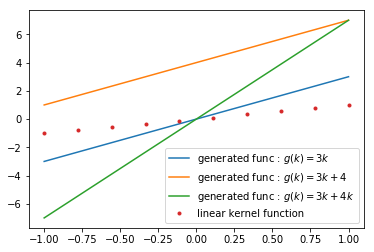

In [73]:
plt.plot(X1,k_func1,label='generated func : $ g(k) = 3k $')
plt.plot(X1,k_func2,label='generated func : $ g(k) = 3k+4 $')
plt.plot(X1,k_func3,label='generated func : $ g(k) = 3k+4k $')
plt.plot(X1,k,'.',label = 'linear kernel function')
plt.legend()
plt.show()

Report $||f||_k$

$||f||^2_k = <f,f>_k = <k_w,k_w>_k = k(w,w)$

function 1:
   $ k_1(w,w) = 3 k(w,w) = 3 w^2  < \infty $
    
function 2:
   $ k_2(w,w) = 3 k(w,w)+4 = 3 w^2 +4 < \infty $
    
function 3:
   $ k_3(w,w) = 3 k(w,w)+4 k(w,w) = 3 w^2 + 4 w^2 < \infty$
    

##################################

## Answer 5 (b)

###################################

In [74]:
def gaussian_kernel (X,X1,p):
    gk = np.exp (-1 *( (X-X1)**2 ) / (2*(p**2) ) )
    return gk

### For each bandwidth $\rho \in \{ 0.1, 0.5, 1 \} $ function hase been generated

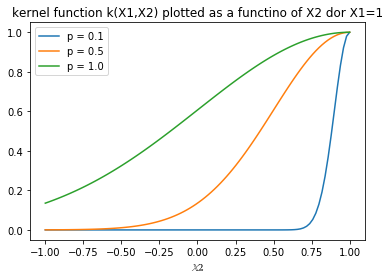

In [75]:
# given
p = np.matrix([0.1,0.5,1])

# defined input space for given limit X = [-1,1]
X1 = np.linspace(-1,1,100).reshape(-1,1)
X2 = X1

for i in range(p.shape[1]):
    k = gaussian_kernel (X1[-1,0],X2,p[0,i])
    plt.plot(X1,k , label = 'p = %s'%p[0,i])
plt.xlabel('$\mathbb{X2}$')
plt.title('kernel function k(X1,X2) plotted as a functino of X2 dor X1=1')
plt.legend()
plt.show()

### We're approximating the feature mapping  $\phi(.)$ using taylor series expansion up to d=150 features

$\gamma = \frac{1}{2 \sigma^2}$
\begin{align}
    e^{- \gamma ||x_i - x_j ||} = & e^{- \gamma(x_i-x_j)^2} = e^{-\gamma x_i^2 + 2\gamma x_i x_j-\gamma x_j^2}  \\
                                = & e^{-\gamma x_i^2 \gamma x_j^2} \Bigg(1 \times 1 + \sqrt{\frac{2\gamma}{1!}}x_i \times \sqrt{\frac{2\gamma}{1!}}x_j + \sqrt{\frac{(2\gamma)^2}{2!}}x_i^2 \times \sqrt{\frac{(2\gamma)^2}{2!}}x_j^2 \nonumber \\ & + \sqrt{\frac{(2\gamma)^3}{3!}}x_i^3 \times \sqrt{\frac{(2\gamma)^3}{3!}}x_j^3 + .......  \Bigg) \\
                                = & \phi(x_i)^T\phi(x_j)
\end{align}
here $\phi(x) = e^{-\gamma x^2} \Bigg[ 1, \sqrt{\frac{(2\gamma)^1}{1!}}x^1 , \sqrt{\frac{(2\gamma)^2}{2!}}x^2 ..... \sqrt{\frac{(2\gamma)^{150} }{150!}}x^{150} \Bigg]^T$

### ploting gaussian basis function $\phi(x_i)$, where $x_i$  = 1

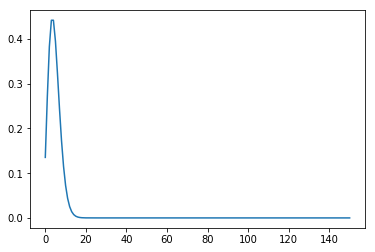

In [76]:
def gaussian_basis(x,p,d):
    gamma = 1/(2*(p**2))
    g = np.matrix(np.zeros([d+1,1]))
    for i in range(d+1):
        from scipy.special import factorial
        g[i,0] = np.sqrt(((2*gamma)**i)/factorial(i, exact=True))*(x**i)
    g_basis = np.exp(-gamma*(x)**2)*g
    return g_basis

d = 150
g_basis=gaussian_basis(X1[-1,0],p[0,1],d) #gaussian basis for Xi = 1
plt.plot(g_basis)

### Plotting function for fixed $\rho$=0.5

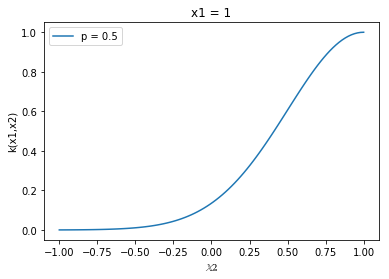

In [77]:
d = 150
x1=X1[-1,0]
g_basis1=gaussian_basis(x1,p[0,1],d) # for fixed p=0.5, X1=1 

func = np.matrix(np.zeros([X1.shape[0],1]))
for k in range(X1.shape[0]):
    x2 = X2[k,0]
    g_basis2=gaussian_basis(x2,p[0,1],d) # for fixed p
    func[k,:]=np.dot(g_basis1.T,g_basis2)
plt.plot(X1,func,label='p = %s'%p[0,1])
plt.xlabel('$\mathbb{X2}$')
plt.ylabel('k(x1,x2)')
plt.title('x1 = 1')
plt.legend()
plt.show()

### ploting functions for $\rho \in \{ 0.1, 0.5, 1 \} $

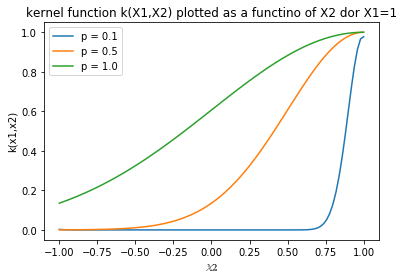

In [78]:
x1=X1[-1,0]
d = 120

# evaluate kernel funciton for different bandwidth
for m in range (p.shape[1]):
    g_basis1=gaussian_basis(x1,p[0,m],d) 
    func = np.matrix(np.zeros([X1.shape[0],1]))
    
    # get kernel function as a function of X2 (when bandwidth P and X1 fixed)
    for k in range(X1.shape[0]):
        x2 = X2[k,0]
        g_basis2=gaussian_basis(x2,p[0,m],d) 
        func[k,:]=np.dot(g_basis1.T,g_basis2)
    plt.plot(X1,func,label='p = %s'%p[0,m])
    plt.xlabel('$\mathbb{X2}$')
    plt.ylabel('k(x1,x2)')
    plt.title('kernel function k(X1,X2) plotted as a functino of X2 dor X1=1')
    plt.legend()
plt.show()